# Project initializaton

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
import numpy as np

In [5]:

from matplotlib import pyplot as plt
from matplotlib import dates as mdates

In [6]:
import user_selection as us
from datetime import datetime, timedelta

In [7]:
data = pd.read_csv(r"C:\Users\Wang\OneDrive\Data science\Norbu project\Norbu Data\events.csv")

In [8]:
data.head(5)

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform
0,20220131,1643651969189000,app_update,NaN,NaN,7,506976,85dfa7ab-33cc-41a9-a270-fe845275d334,a79e257a7d497caefb55a8c8b85d4d30,1.643652e+15,1758290749,ANDROID
1,20220131,1643651969189000,app_update,NaN,NaN,7,506976,85dfa7ab-33cc-41a9-a270-fe845275d334,a79e257a7d497caefb55a8c8b85d4d30,1.643652e+15,1758290749,ANDROID
2,20220131,1643643061910006,scr_MbscMeditation,1.643485e+15,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,1.643312e+15,1758290749,ANDROID
3,20220131,1643643061910006,scr_MbscMeditation,1.643485e+15,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,1.643312e+15,1758290749,ANDROID
4,20220131,1643643064888009,scr_home,1.643485e+15,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,1.643312e+15,1758290749,ANDROID


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361739 entries, 0 to 5361738
Data columns (total 12 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   event_date                     int64  
 1   event_timestamp                int64  
 2   event_name                     object 
 3   event_previous_timestamp       float64
 4   event_value_in_usd             float64
 5   event_bundle_sequence_id       int64  
 6   event_server_timestamp_offset  int64  
 7   user_id                        object 
 8   user_pseudo_id                 object 
 9   user_first_touch_timestamp     float64
 10  stream_id                      int64  
 11  platform                       object 
dtypes: float64(3), int64(5), object(4)
memory usage: 490.9+ MB


types of data shall be changed to datetime
- event_date
- event_timestamp                
- event_previous_timestamp       
- user_first_touch_timestamp     

In [10]:
data.isna().sum()

event_date                             0
event_timestamp                        0
event_name                             0
event_previous_timestamp         1661416
event_value_in_usd               5361443
event_bundle_sequence_id               0
event_server_timestamp_offset          0
user_id                           225413
user_pseudo_id                         0
user_first_touch_timestamp             6
stream_id                              0
platform                               0
dtype: int64

In [11]:
data.isna().sum() / data.shape[0]

event_date                       0.000000
event_timestamp                  0.000000
event_name                       0.000000
event_previous_timestamp         0.309865
event_value_in_usd               0.999945
event_bundle_sequence_id         0.000000
event_server_timestamp_offset    0.000000
user_id                          0.042041
user_pseudo_id                   0.000000
user_first_touch_timestamp       0.000001
stream_id                        0.000000
platform                         0.000000
dtype: float64

Missing values in 
- event_previous_timestamp         
- event_value_in_usd
- user_id                          

#  Preprocessing

## data types

In [12]:
data['event_timestamp'] = pd.to_datetime(data['event_timestamp'], unit='us').dt.floor('s')
data['user_first_touch_timestamp'] = pd.to_datetime(data['user_first_touch_timestamp'], unit='us').dt.floor('s')
data['event_previous_timestamp'] = pd.to_datetime(data['event_previous_timestamp'], unit='us').dt.floor('s')
data['event_date'] = pd.to_datetime(data['event_date'], format='%Y%m%d')

In [13]:
data.head()

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform
0,2022-01-31,2022-01-31 17:59:29,app_update,NaT,NaN,7,506976,85dfa7ab-33cc-41a9-a270-fe845275d334,a79e257a7d497caefb55a8c8b85d4d30,2022-01-31 17:59:29,1758290749,ANDROID
1,2022-01-31,2022-01-31 17:59:29,app_update,NaT,NaN,7,506976,85dfa7ab-33cc-41a9-a270-fe845275d334,a79e257a7d497caefb55a8c8b85d4d30,2022-01-31 17:59:29,1758290749,ANDROID
2,2022-01-31,2022-01-31 15:31:01,scr_MbscMeditation,2022-01-29 19:29:07,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,2022-01-27 19:32:13,1758290749,ANDROID
3,2022-01-31,2022-01-31 15:31:01,scr_MbscMeditation,2022-01-29 19:29:07,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,2022-01-27 19:32:13,1758290749,ANDROID
4,2022-01-31,2022-01-31 15:31:04,scr_home,2022-01-29 19:30:30,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,2022-01-27 19:32:13,1758290749,ANDROID


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361739 entries, 0 to 5361738
Data columns (total 12 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   event_date                     datetime64[ns]
 1   event_timestamp                datetime64[ns]
 2   event_name                     object        
 3   event_previous_timestamp       datetime64[ns]
 4   event_value_in_usd             float64       
 5   event_bundle_sequence_id       int64         
 6   event_server_timestamp_offset  int64         
 7   user_id                        object        
 8   user_pseudo_id                 object        
 9   user_first_touch_timestamp     datetime64[ns]
 10  stream_id                      int64         
 11  platform                       object        
dtypes: datetime64[ns](4), float64(1), int64(3), object(4)
memory usage: 490.9+ MB


## Missing values

### event_previous_timestamp         

In [15]:
data[data['event_previous_timestamp'].isna()==True]

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform
0,2022-01-31,2022-01-31 17:59:29,app_update,NaT,NaN,7,506976,85dfa7ab-33cc-41a9-a270-fe845275d334,a79e257a7d497caefb55a8c8b85d4d30,2022-01-31 17:59:29,1758290749,ANDROID
1,2022-01-31,2022-01-31 17:59:29,app_update,NaT,NaN,7,506976,85dfa7ab-33cc-41a9-a270-fe845275d334,a79e257a7d497caefb55a8c8b85d4d30,2022-01-31 17:59:29,1758290749,ANDROID
18,2022-01-31,2022-01-31 15:31:01,mbsc_start_training_med1,NaT,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,2022-01-27 19:32:13,1758290749,ANDROID
20,2022-01-31,2022-01-31 15:31:01,mbsc_start_training_med1,NaT,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,2022-01-27 19:32:13,1758290749,ANDROID
27,2022-01-31,2022-01-31 15:31:09,scr_bs_meditation,NaT,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,2022-01-27 19:32:13,1758290749,ANDROID
...,...,...,...,...,...,...,...,...,...,...,...,...
5361587,2022-01-30,2022-01-30 03:25:37,mbsc_share_send_invite_med2,NaT,NaN,4,880473,68093494-6ce6-4d8b-869e-5890e14f3974,1d26dcf3726a61917713ca14f6b47b86,2022-01-30 03:22:02,1758290749,ANDROID
5361589,2022-01-30,2022-01-30 03:25:42,mbsc_start_training_med2,NaT,NaN,4,880473,68093494-6ce6-4d8b-869e-5890e14f3974,1d26dcf3726a61917713ca14f6b47b86,2022-01-30 03:22:02,1758290749,ANDROID
5361595,2022-01-30,2022-01-30 03:26:20,premium_click_on_banner,NaT,NaN,4,880473,68093494-6ce6-4d8b-869e-5890e14f3974,1d26dcf3726a61917713ca14f6b47b86,2022-01-30 03:22:02,1758290749,ANDROID
5361599,2022-01-30,2022-01-29 21:29:13,app_remove,NaT,NaN,7,1021059,aa1bcbd1-ede6-42dd-aa17-b0e525a2df00,8c3ae6ebe783cd4ce3db22ddc4144550,2022-01-09 18:05:39,1758290749,ANDROID


In [16]:
# drop the rows with missing user_first_touch_timestamp
# only 6 rows
data.dropna(subset='user_first_touch_timestamp', inplace=True)

In [17]:
data.isna().sum()

event_date                             0
event_timestamp                        0
event_name                             0
event_previous_timestamp         1661410
event_value_in_usd               5361437
event_bundle_sequence_id               0
event_server_timestamp_offset          0
user_id                           225412
user_pseudo_id                         0
user_first_touch_timestamp             0
stream_id                              0
platform                               0
dtype: int64

## Duplicated 

In [18]:
data.duplicated().sum() / data.shape[0]

0.18604357956653195

- 18.4 % of collected entries are duplicated

In [19]:
data = data.drop_duplicates()

# EDA

## General information

In [20]:
start_date = data['event_date'].min()
end_date = data['event_date'].max()

In [21]:
new_users_cnt = data[data['user_first_touch_timestamp'] >= start_date]['user_pseudo_id'].unique().shape[0]
early_users_cnt = data[data['user_first_touch_timestamp'] < start_date]['user_pseudo_id'].unique().shape[0]

C:\Users\Wang\AppData\Local\Temp\ipykernel_14608\807091090.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tranparent" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('new old.png', tranparent=True, dpi=600)


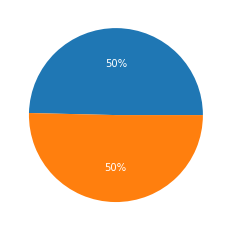

In [22]:
fig, ax = plt.subplots()
labels = ['new users', 'early users']
ax.pie([new_users_cnt, early_users_cnt], labels=labels, textprops={'color':'white'}, autopct='%1.0f%%')
plt.savefig('new old.png', tranparent=True, dpi=600)

In [23]:
ios_users_cnt = data[data['platform'] == 'IOS']['user_pseudo_id'].unique().shape[0]
and_users_cnt = data[data['platform'] != 'IOS']['user_pseudo_id'].unique().shape[0]

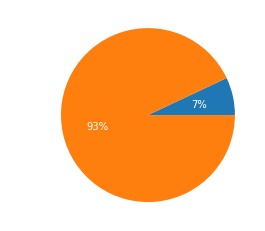

In [24]:
fig, ax = plt.subplots()
labels = ['IOS', 'ANDROID']
ax.pie([ios_users_cnt, and_users_cnt], labels=labels, textprops={'color':'white'}, autopct='%1.0f%%')
plt.savefig('ios vs and.png', dpi=600)

## User active duration

create a user behavior table, first check its active duration

In [25]:
active_duration = us.user_active_duration(data, data)

In [26]:
users = active_duration

In [27]:
users = users.reset_index()

In [28]:
users.rename(columns = {'index': 'user_pseudo_id'}, inplace=True)

In [29]:
users

,user_pseudo_id,max,user_first_touch_timestamp,active_duration
0,000150e523a4ece168a408a1a9e4d6d6,2022-02-24,2022-02-22,2 days
1,000185282d979ade370ea3c072b06507,2022-02-10,2022-01-10,31 days
2,0001e48c9217f5614db12a3b3cb30b35,NaT,2022-02-05,0 days
3,00025b69a6a6a4c18bfd21f137b62685,2022-02-08,2022-01-11,28 days
4,00026eef62717d579a0a89ee3853743e,2022-02-26,2022-02-25,1 days
...,...,...,...,...
83293,fff47e71da4b19218705a16de6eef68a,NaT,2022-03-03,0 days
83294,fff5e1fb894a59add89b18601b8a701f,2022-03-28,2022-03-16,12 days
83295,fff684d58e7fa0fc0093601dd8b22961,NaT,2021-11-13,0 days
83296,fff7bd35c98774c099dc6155129c530a,2022-03-27,2022-03-27,0 days


## Retention rate

### general retention rate (disregard the user sign up time )

<AxesSubplot:ylabel='Frequency'>

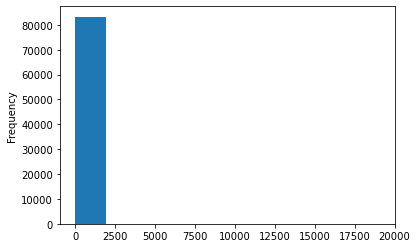

In [30]:
active_duration['active_duration'].dt.days.plot(kind='hist')

(0.0, 100.0)

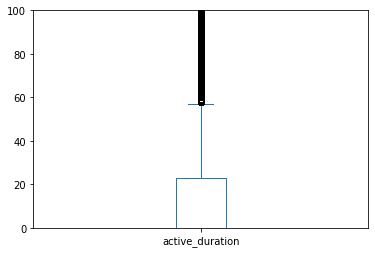

In [31]:
plt.figure()
active_duration['active_duration'].dt.days.plot(kind='box')
plt.ylim(0, 100)

In [32]:
duration_series = us.user_active_duration(data, data)['active_duration'].dt.days
duration_series = duration_series[(duration_series > 0) & (duration_series < 300)]

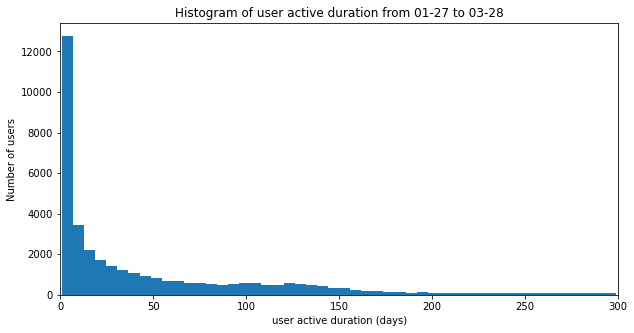

In [33]:
# user active duration = user's latest session start date (day) - user's earliest session start time (day)
# use user_active_duration function from user_selection script
plt.figure(figsize=(10,5))
plt.hist(duration_series, bins=50)
plt.title('Histogram of user active duration from 01-27 to 03-28')
plt.xlabel('user active duration (days)')
plt.ylabel('Number of users')
plt.xlim(0, 300)
plt.show()

- Substaintial amount of users have active time less than 1 day
- Number of users gradually decrease with longer active time

In [34]:
# based on user active duration
# get the retention rate after 2, 7, 14 and 28 days on android and ios platforms
data_android = data.query('platform == "ANDROID"')
data_ios = data.query('platform == "IOS"')

user_grouped_data_android = us.user_active_duration(data, data_android)
user_grouped_data_ios = us.user_active_duration(data, data_ios)

retention_days, retention_rate_android, retention_rate_ios = [2, 7, 14, 28], [], []
#PERIOD_END = pd.to_datetime('20220328')
for days in retention_days:
    retention_rate_android.append(us.retention_rate(user_grouped_data_android, days))
    retention_rate_ios.append(us.retention_rate(user_grouped_data_ios, days))


In [35]:
# round the retention rate
retention_rate_android = [round(num, 2) for num in retention_rate_android]
retention_rate_ios = [round(num, 2) for num in retention_rate_ios]

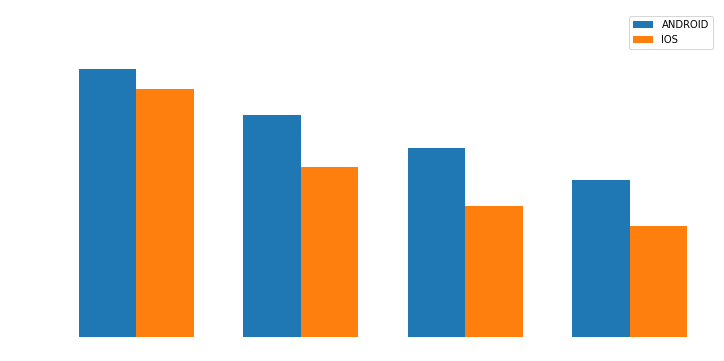

In [36]:
# plot the retention rate
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(retention_days))
width = 0.35
fig_1 = ax.bar(x-0.5*width,retention_rate_android, width, label='ANDROID')
fig_2 = ax.bar(x+0.5*width,retention_rate_ios, width, label='IOS')
ax.legend()
ax.bar_label(fig_1, color='w')
ax.bar_label(fig_2, color='w')
ax.set_ylabel('retention rate', fontsize=14, color='w')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
ax.set_xticks(x, ['2 days', '7 days', '14 days', '28 days'])
#ax.set_title('retention rate of 2, 7, 14 and 28 days')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylim(0,0.5)
plt.show()
fig.savefig('general_retenion.png', transparent=True, dpi=600)

### Cohort retention rate

In [37]:
# cohort: group of users who's first_open is on the same day
# assess the cohort retention rate

start_date = pd.to_datetime('20220127')
end_date = pd.to_datetime('20220328')
last_date = pd.to_datetime('20220328')
days_list = []  
whole_retention_list = []
users_volumn = []
for single_date in us.single_date_generator(start_date, end_date):
    days_list.append(single_date)
    cohort_data = us.first_open(data, single_date, single_date)
    cohort_data_grouped = us.user_active_duration(data, cohort_data)
    users_volumn.append(len(cohort_data_grouped))
    retention_list = []
    for days in [2, 7, 14, 28]:
        if last_date - single_date >= timedelta(5 + days):
            retention_list.append(us.cohort_retention_rate(cohort_data_grouped, days))
        else:
            retention_list.append(None)
    whole_retention_list.append(retention_list)

cohort_retention_0201_0228 = pd.DataFrame(whole_retention_list, index=days_list, columns=['2 days', '7 days', '14 days', '28 days'])
cohort_retention_0201_0228['users'] = users_volumn

In [38]:
cohort_retention_0201_0228

,2 days,7 days,14 days,28 days,users
2022-01-27,0.422,0.282,0.219,0.133,843
2022-01-28,0.436,0.282,0.190,0.114,901
2022-01-29,0.427,0.274,0.203,0.121,898
2022-01-30,0.377,0.246,0.183,0.107,812
2022-01-31,0.441,0.287,0.200,0.108,888
2022-02-01,0.393,0.259,0.203,0.116,833
2022-02-02,0.397,0.261,0.192,0.110,863
2022-02-03,0.395,0.256,0.185,0.106,811
2022-02-04,0.392,0.258,0.180,0.095,855
2022-02-05,0.430,0.289,0.199,0.110,717


In [39]:
print(cohort_retention_0201_0228['2 days'].mean())
print(cohort_retention_0201_0228['7 days'].mean())
print(cohort_retention_0201_0228['14 days'].mean())
print(cohort_retention_0201_0228['28 days'].mean())

0.3586666666666667
0.22540816326530605
0.1582380952380953
0.08575


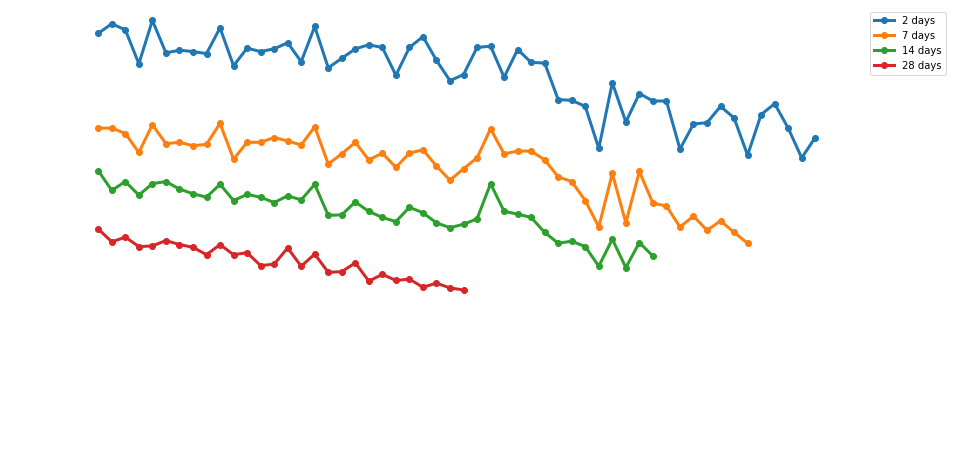

In [40]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(16, 8))
ax1.plot(cohort_retention_0201_0228.loc[:, '2 days':'28 days'], 'o-', label = ['2 days', '7 days', '14 days', '28 days'], linewidth=3)
#ax1.grid()
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_title('Cohort retention rate in Feb')
ax1.legend()
ax1.set_ylabel('Cohort retention rate', color='w', fontsize=14)
ax1.tick_params(axis='y', colors='w')
ax1.tick_params(axis='x', colors='w')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.plot(cohort_retention_0201_0228.users, 'o-', color='w', linewidth=3)
#ax2.grid()
#ax2.set_title('Daily new users in Feb', color='w')
ax2.set_ylabel('daily new users', color='w', fontsize=14)
ax2.set_yticks([250, 500, 750, 1000, 1250])
#ax2.xaxis.set_major_locator(mdates.DayLocator(interval=4))
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.tick_params(axis='y', colors='w')
ax2.tick_params(axis='x', colors='w')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
fig.savefig('cohort_retention.png', transparent=True, dpi=600)

### Earlier users

In [41]:
user_first_touch = data.groupby('user_pseudo_id')['user_first_touch_timestamp'].min()

In [42]:
user_first_touch[user_first_touch < pd.to_datetime('2022-01-27')].shape

(41963,)

In [43]:
user_first_touch[user_first_touch >= pd.to_datetime('2022-01-27')].shape

(41335,)

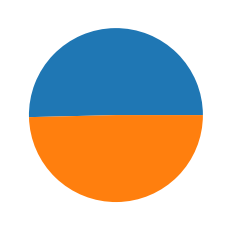

In [44]:
fig, ax = plt.subplots()

ax.pie([41963, 41335]) 
plt.savefig('new old.png', dpi=600)

In [45]:
early_user = user_first_touch[user_first_touch < pd.to_datetime('2022-01-27')].index

In [46]:
active_duration.loc[early_user]['active_duration'].dt.days.describe()

count    41963.000000
mean        71.627958
std        152.134238
min          0.000000
25%          0.000000
50%          0.000000
75%         99.000000
max      19065.000000
Name: active_duration, dtype: float64

In [47]:
active_duration['active_duration'].dt.days.describe()

count    83298.000000
mean        38.440323
std        113.241906
min         -8.000000
25%          0.000000
50%          0.000000
75%         23.000000
max      19065.000000
Name: active_duration, dtype: float64

In [48]:
early_user_duration = active_duration.loc[early_user]

In [49]:
early_user_duration

,max,user_first_touch_timestamp,active_duration
user_pseudo_id,,,
000185282d979ade370ea3c072b06507,2022-02-10,2022-01-10,31 days
00025b69a6a6a4c18bfd21f137b62685,2022-02-08,2022-01-11,28 days
000331515c49e80071f8dcef09da92c0,2022-02-23,2021-11-19,96 days
000405116e43117325473d9bfebac364,2022-03-24,2021-10-31,144 days
0004a00a76f7d1dcecd333d5861a11a3,2022-02-06,2022-01-23,14 days
...,...,...,...
ffef3cd6f718322521b530db80dde0f3,2022-03-12,2021-11-22,110 days
ffef726d5c6128d3493434d4b10f75ac,2022-01-29,2022-01-18,11 days
fff440a784c11dfd663d033410ad15c1,2022-03-27,2021-10-13,165 days


In [50]:
early_user_active_duration = early_user_duration[early_user_duration['active_duration'] != timedelta(days = 0)]

In [51]:
early_user_active_duration = us.del_abnormal(early_user_active_duration)

In [52]:
active_early_users = early_user_active_duration.index
active_early_users

Index(['000185282d979ade370ea3c072b06507', '00025b69a6a6a4c18bfd21f137b62685',
       '000331515c49e80071f8dcef09da92c0', '000405116e43117325473d9bfebac364',
       '0004a00a76f7d1dcecd333d5861a11a3', '0007613a3b61c7b7128bc2d563d6f4fb',
       '0013f1f486e2f28444f0a8380b1d94c4', '00160d952b315e006c294fdc9405ce21',
       '001b18c05df60a505ccfeed4f89d3200', '001df58bc3fdf546470b163b9121c377',
       ...
       'ffe2d6c68b00c3ca05f9f93b5a80da77', 'ffe35ded6570fa7f033afbd03a17f1d1',
       'ffe40be884d558cc7e6e3b08a4a7673a', 'ffe42ebfc450fc9bc36361214be213f8',
       'ffecf21e7a34bcd6b79fcf5d4772b723', 'ffed7b281797c60d759a4ae558f580e9',
       'ffef3cd6f718322521b530db80dde0f3', 'ffef726d5c6128d3493434d4b10f75ac',
       'fff440a784c11dfd663d033410ad15c1', 'fffb902935f0da29272b261b1604b67f'],
      dtype='object', name='user_pseudo_id', length=19894)

In [53]:
early_user_active_duration['active_duration'].dt.days.describe()

count    19894.000000
mean       144.216045
std        130.005088
min          1.000000
25%         51.000000
50%        103.000000
75%        182.000000
max        534.000000
Name: active_duration, dtype: float64

<AxesSubplot:>

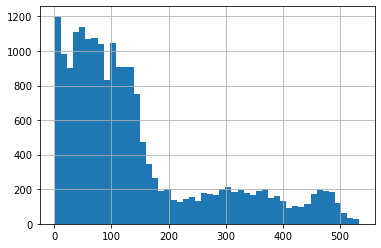

In [54]:
early_user_active_duration['active_duration'].dt.days.hist(bins = 50)

<AxesSubplot:>

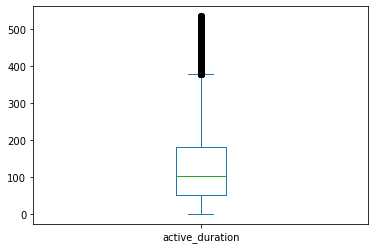

In [55]:
early_user_active_duration['active_duration'].dt.days.plot(kind='box')

In [56]:
# how many purchases for the early useer
data[(data['user_pseudo_id'].isin(early_user)) & (data['event_value_in_usd'] > 0)].shape[0]

28

In [57]:
28 / len(early_user)

0.0006672544860948931

## Purchase conversion rate

### total purchases and daily purchases

In [58]:
purchase = data[(data['event_value_in_usd'].isna() == False) & (data['event_value_in_usd'] != 0)]
purchase.head()

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform
117929,2022-03-08,2022-03-07 21:25:34,in_app_purchase,NaT,2.504442,45,281621,b6f9b20d-ed57-4423-aeb4-3179fd08337a,BDA771C0602246D28A39F098119D87A1,2022-02-23 16:41:53,1758311369,IOS
235418,2022-02-18,2022-02-18 06:13:00,in_app_purchase,2022-02-18 06:12:51,14.990000,55,1197283653,e65da61b-553b-461c-9ca8-852d7bd98990,8bcfbaecaf9b8389f05bfe8d508ebd82,2021-05-10 16:30:25,1758290749,ANDROID
236221,2022-02-18,2022-02-18 11:06:01,in_app_purchase,NaT,18.173402,28,76962,08bd768f-bdb8-4d8c-9c47-d1e3955c9a9f,5D14D82361B740ED8D2E09BD1FE15616,2021-05-02 15:49:44,1758311369,IOS
240735,2022-02-18,2022-02-18 16:51:21,in_app_purchase,NaT,18.173402,72,143783,92128b73-d691-409c-acc8-02f3b102356f,1BEA1056EEF24C72BAA77E23B7E577CA,2022-01-31 15:11:21,1758311369,IOS
243368,2022-02-18,2022-02-17 23:23:21,in_app_purchase,NaT,17.335853,13,86991,62838f2b-66d1-44c2-a32b-4e23441f1e32,0E05A9B1135246FB87A8908DA9815FDB,2022-02-06 20:30:00,1758311369,IOS


In [59]:
user_purchase = (purchase.groupby('user_pseudo_id')['event_value_in_usd']
                         .sum()
                         .reset_index())
user_purchase

,user_pseudo_id,event_value_in_usd
0,047003CD5E984318B1E9C76910C9DAD7,2.490000
1,05b6875b4ef8e180cb3ff6381f7fa8ab,17.849224
2,078F613E9DE9481FB11BCEAF4C9B2DEC,3.362470
3,0852a1ea2cdc0b847652645c5b5c8fc2,4.156403
4,0B401995337E490CA49AEA8C902D29EC,2.544328
5,0B6CD44CA13F4C109A1185EA96F7B630,18.008497
6,0DC514128EB94406B44A368054A5922F,2.202311
7,0E05A9B1135246FB87A8908DA9815FDB,17.335853
8,117A7A744442493A97FAE5F47DC5F094,18.254526
9,141DE52782C54F6F8A1A4E669C80C8C7,3.887455


In [60]:
users = us.merge_tb(users, user_purchase)

In [61]:
users['event_value_in_usd'] = users['event_value_in_usd'].fillna(0)

In [62]:
month_cnt = 0
year_cnt = 0
lift_cnt = 0
for i in range(len(purchase)):
    if purchase.iloc[i]['event_value_in_usd'] < 10:
        month_cnt += 1
    elif 10 <= purchase.iloc[i]['event_value_in_usd'] < 40:
        year_cnt += 1
    else:
        lift_cnt += 1

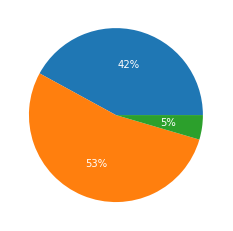

In [63]:
fig, ax = plt.subplots()
ax.pie([month_cnt, year_cnt, lift_cnt], labels=['monthly', 'yearly', 'life'], autopct='%1.0f%%', textprops={'color':'white'})
plt.savefig('purchase percent.png', dpi=600)

In [64]:
# Calculate revenue
month_rev = 0
year_rev = 0
lift_rev = 0
for i in range(len(purchase)):
    event_value = purchase.iloc[i]['event_value_in_usd']
    if event_value < 10:
        month_rev += event_value
    elif 10 <= event_value < 40:
        year_rev += event_value
    else:
        lift_rev += event_value

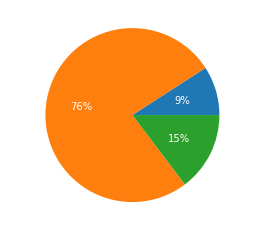

In [65]:
# plot revenue 
fig, ax = plt.subplots()
ax.pie([month_rev, year_rev, lift_rev], labels=['monthly', 'yearly', 'life'], autopct='%1.0f%%', textprops={'color':'white'})
plt.savefig('revenue percent.png', dpi=600)

<AxesSubplot:>

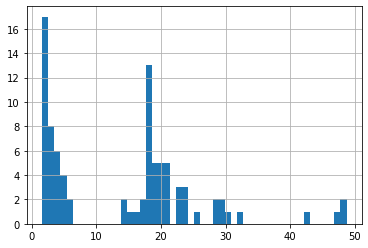

In [66]:
data[(data['event_value_in_usd'].isna() == False) & (data['event_value_in_usd'] != 0)]['event_value_in_usd'].hist(bins=50)

In [67]:
# purchase counts each day

purchase_day = purchase.groupby('event_date')['event_name'].count()

# new users daily over the whole dataframe period 01-27 to 03-28
daily_new = data.query('event_name == "first_open"').groupby('event_date')['event_name'].count()

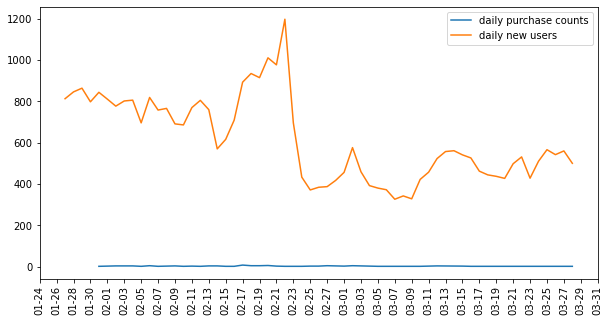

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.plot(purchase_day.loc['2022-01-27':'2022-03-28'], label='daily purchase counts')
ax.plot(daily_new,  label='daily new users')

plt.legend()
plt.xticks(rotation=90)
plt.show()

### purchase conversion for cohort feb

In [69]:
# get the total purchase counts (times of purchase) of each cohort group from 02.01 to 02.28 in the spam of two month
days_list = []
purchase_list = []
for single_date in us.single_date_generator(start_date, end_date):
    days_list.append(single_date)
    cohort_data = us.first_open(data, single_date, single_date)
    purchase_list.append(cohort_data[cohort_data['event_value_in_usd'] > 0].shape[0])
    
purchase_df = pd.DataFrame(data=purchase_list, index=days_list, columns = ['purchase_count'])
purchase_df.sum()

purchase_count    60
dtype: int64

In [70]:
purchase_df['users'] = cohort_retention_0201_0228['users']

In [71]:
purchase_df['conversion'] = purchase_df['purchase_count'] / cohort_retention_0201_0228['users']

In [72]:
# find purchase counts from earlier users 
early_user_purcahse = (data[(data['event_value_in_usd'] > 0) & 
                      (data['user_first_touch_timestamp'] < start_date)]
                      .sort_values(by='event_timestamp')
                      .groupby('event_date')['event_timestamp'].count())


In [73]:
days_list = []
early_purchase_list = []
for single_date in us.single_date_generator(start_date, end_date):
    days_list.append(single_date)
    early_purchase = data[(data['event_value_in_usd'] > 0) & 
                          (data['user_first_touch_timestamp'] < start_date) &
                          (data['event_timestamp'].dt.floor('d') == single_date)] 
    early_purchase_list.append(early_purchase.shape[0])
    
early_purchase_df = pd.DataFrame(data=early_purchase_list, index=days_list, columns = ['purchase_count'])


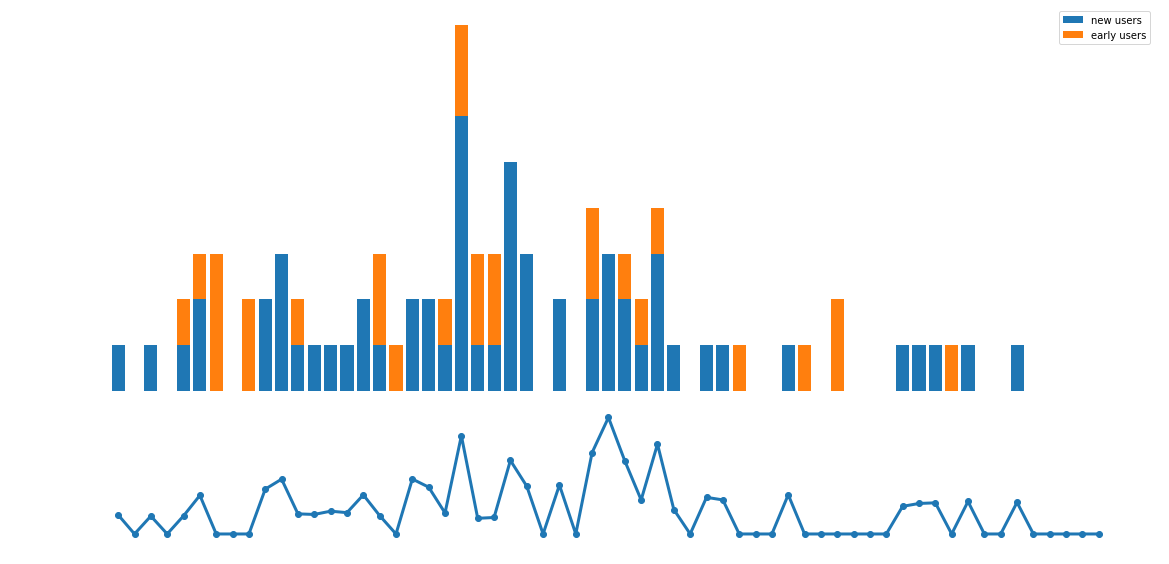

In [74]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(16, 8))
fig.tight_layout()

ax1.bar(purchase_df.index, purchase_df['purchase_count'], label='new users')
ax1.bar(early_purchase_df.index, early_purchase_df['purchase_count'], bottom=purchase_df['purchase_count'], label='early users')

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_ylabel('purchase counts', color='w', fontsize=16)
#ax1.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax1.legend()
ax1.tick_params(axis='y', colors='w')
ax1.tick_params(axis='x', colors='w')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.plot(purchase_df['conversion'], 'o-', label = 'purchase conversion rate', linewidth=3)
#ax2.plot(purchase_df['user_conversion'], 'o-', label = 'user conversion rate', linewidth=3)
#ax2.xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)#
#ax2.set_yticks([i*0.02 for i in range(7)])
ax2.set_ylabel('conversion rate', fontsize=16, color='w')
ax2.tick_params(axis='y', colors='w')
ax2.tick_params(axis='x', colors='w')
#ax2.legend()
plt.show()
fig.savefig('pruchase conversion.png', dpi=600, transparent=True, bbox_inches='tight')

for users who signed up in period  
- 41335 users sighed up
- 60 users completed at least one purchase
- **Conversion rate : 0.15 %**


## User behavior (first open in Feb)

### App usage times

In [75]:
# event session_start cnt
session_start = data.query('event_name == "session_start"').groupby('user_pseudo_id')['event_name'].count()
session_start = session_start.reset_index()
session_start.columns = ['user_pseudo_id', 'session_start_counts']
session_start

,user_pseudo_id,session_start_counts
0,000150e523a4ece168a408a1a9e4d6d6,7
1,000185282d979ade370ea3c072b06507,1
2,00025b69a6a6a4c18bfd21f137b62685,4
3,00026eef62717d579a0a89ee3853743e,2
4,000331515c49e80071f8dcef09da92c0,3
...,...,...
67035,fff440a784c11dfd663d033410ad15c1,2
67036,fff5e1fb894a59add89b18601b8a701f,13
67037,fff684d58e7fa0fc0093601dd8b22961,1
67038,fff7bd35c98774c099dc6155129c530a,3


In [76]:
users = us.merge_tb(users, session_start)

In [77]:
purchaser = users.query('event_value_in_usd > 0')['user_pseudo_id'].unique()
non_purchaser = users.query('event_value_in_usd == 0')['user_pseudo_id'].unique()

In [78]:
session_start_1 = session_start[session_start['user_pseudo_id'].isin(purchaser)]
session_start_0 = session_start[session_start['user_pseudo_id'].isin(non_purchaser)]


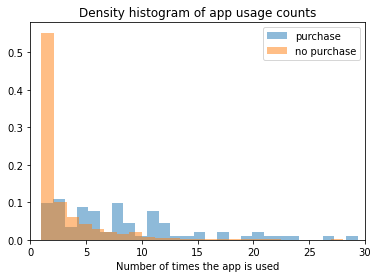

In [79]:
fig, ax = plt.subplots()
ax.hist(session_start_1.session_start_counts, alpha=0.5, bins=100, density=True, label='purchase' )
ax.hist(session_start_0.session_start_counts, alpha=0.5, bins=1000, density=True, label='no purchase')
ax.set_title('Density histogram of app usage counts')
ax.set_xlabel('Number of times the app is used')
plt.xlim(0, 30)
plt.legend()
plt.show()

- user who purchased uses the app more often than users who did not purchase

In [80]:
session_start_1['session_start_counts'].describe()

count     87.000000
mean      13.574713
std       17.477981
min        1.000000
25%        4.500000
50%        8.000000
75%       13.500000
max      106.000000
Name: session_start_counts, dtype: float64

In [81]:
session_start_0['session_start_counts'].describe()

count    66953.000000
mean         3.888728
std         13.528099
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1129.000000
Name: session_start_counts, dtype: float64

- median app usages times 
    - purchase user: 8
    - no purchase user: 2

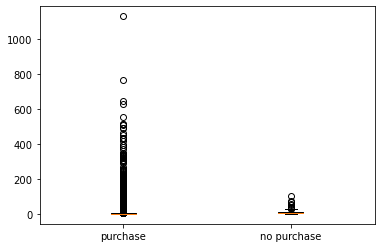

In [82]:
fig, ax = plt.subplots()
box_data = [session_start_0['session_start_counts'], session_start_1['session_start_counts']]
ax.boxplot(box_data)
ax.set_xticks([1,2], ['purchase', 'no purchase'])
plt.show()

- large amount of outliers, who use the app more frequently than others

### 5 days plan
5 days of consecutive training

In [83]:
unlock_start = data[data['event_name'].str.contains('scr_unlock_start')]

In [84]:
users_unlock_start = unlock_start.groupby('user_pseudo_id')['event_name'].count().reset_index()

In [85]:
users_unlock_start.rename(columns={'event_name': 'unlock_start'}, inplace=True)

In [86]:
unlock_finish = data[data['event_name'].str.contains('unlock_finish')]

In [87]:
users_unlock_finish = unlock_finish.groupby('user_pseudo_id')['event_name'].count().reset_index()

In [88]:
users_unlock_finish.rename(columns={'event_name': 'unlock_finish'}, inplace=True)

In [89]:
users = us.merge_tb(users, users_unlock_start)
users = us.merge_tb(users, users_unlock_finish)

In [90]:
users[['unlock_start', 'unlock_finish']] = users[['unlock_start', 'unlock_finish']].fillna(0)

In [91]:
# unlock progress

unlock_progress = data[data['event_name'].str.contains(r'^unlock_\w*_\d')]

In [92]:
unlock_progress

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform
2762,2022-03-18,2022-03-17 22:10:32,unlock_qh1_1,NaT,NaN,10,1210154,f4543187-bfb9-452f-8826-6d223927c75d,70def84f322e292adc624020b55c595a,2022-02-13 02:49:31,1758290749,ANDROID
3527,2022-03-18,2022-03-18 20:42:08,unlock_qh0_1,NaT,NaN,11,1179790,299398ad-77f6-4978-9b1a-02c7690ed18b,1dea372e4afe6ee5a8d8d3eb2375da52,2022-03-18 18:57:56,1758290749,ANDROID
3547,2022-03-18,2022-03-18 20:47:27,unlock_qh1_1,NaT,NaN,13,634441,299398ad-77f6-4978-9b1a-02c7690ed18b,1dea372e4afe6ee5a8d8d3eb2375da52,2022-03-18 18:57:56,1758290749,ANDROID
3569,2022-03-18,2022-03-18 20:52:59,unlock_qh4_1,NaT,NaN,14,585965,299398ad-77f6-4978-9b1a-02c7690ed18b,1dea372e4afe6ee5a8d8d3eb2375da52,2022-03-18 18:57:56,1758290749,ANDROID
3585,2022-03-18,2022-03-18 20:55:39,unlock_qh6_1,NaT,NaN,15,284330,299398ad-77f6-4978-9b1a-02c7690ed18b,1dea372e4afe6ee5a8d8d3eb2375da52,2022-03-18 18:57:56,1758290749,ANDROID
...,...,...,...,...,...,...,...,...,...,...,...,...
5358789,2022-01-30,2022-01-30 06:53:08,unlock_qh5_1,NaT,NaN,73,162,4984c5d3-4733-4aaf-bef8-c07acf9f566e,1625b013ab65061ec2eb540b85d8e523,2022-01-29 21:40:34,1758290749,ANDROID
5359093,2022-01-30,2022-01-30 19:56:20,unlock_qh0_1,NaT,NaN,5,194545,b95e21c1-1824-469b-9a3a-e61a6e4e9345,a5e3baa03296f3e1a30264037b606b94,2022-01-30 19:44:00,1758290749,ANDROID
5359323,2022-01-30,2022-01-30 14:05:07,unlock_qh0_1,NaT,NaN,16,1968608,5722e3f1-13fa-4f24-a4ed-c744ae5bc4b5,8bb85c3b181945fc9a0ef4f06fdf0a41,2021-11-11 10:35:47,1758290749,ANDROID
5361145,2022-01-30,2022-01-30 03:29:06,unlock_qh5_5,NaT,NaN,236,504,ed4a9c8c-da13-40c3-9afe-0bd90791432e,3db21e922c5e0bc6a18d75518e20eea1,2022-01-12 16:03:08,1758290749,ANDROID


In [93]:
progress_day = unlock_progress['event_name'].str.extract(r'(\d$)')

In [94]:
progress_day.reset_index(inplace=True)

In [95]:
progress_day = progress_day[0].value_counts()

In [96]:
progress_day

1    12071
2     1162
3      466
4      309
5      205
Name: 0, dtype: int64

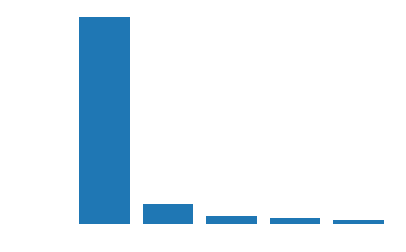

In [97]:
fig, ax = plt.subplots()
x = np.arange(1, 6)
ax.bar(x, progress_day)
ax.set_ylabel('unlock training counts', fontsize=14, color='white')
ax.set_xticks(x, ['1 day', '2 days', '3 days', '4 days', '5 days'], fontsize=14, color='white')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('unlock days.png', transparent=True, dpi=600, bbox_inches='tight')

### Session time 
at which time of day does the user engage with the app

In [98]:
session_start_time = data.query('event_name == "session_start"')[['event_timestamp', 'user_pseudo_id']]

In [99]:
def ftod(x):
    if x >= 0 and x < 6:
        tod = 'night'
    elif x >= 6 and x < 12:
        tod = 'morning'
    elif x >= 12 and x < 18:
        tod = 'afternoon'
    else: 
        tod = 'evening'
    return tod

session_start_time['time_of_day'] = session_start_time.event_timestamp.dt.hour.map(ftod)
session_start_time_pt = pd.pivot_table(session_start_time, index='user_pseudo_id',
                                       columns='time_of_day',
                                       values = 'event_timestamp',
                                       aggfunc='count')

session_start_time_pt = session_start_time_pt.reset_index().fillna(0)
session_start_time_pt

time_of_day,user_pseudo_id,afternoon,evening,morning,night
0,000150e523a4ece168a408a1a9e4d6d6,4.0,1.0,1.0,1.0
1,000185282d979ade370ea3c072b06507,1.0,0.0,0.0,0.0
2,00025b69a6a6a4c18bfd21f137b62685,2.0,2.0,0.0,0.0
3,00026eef62717d579a0a89ee3853743e,0.0,0.0,2.0,0.0
4,000331515c49e80071f8dcef09da92c0,0.0,2.0,0.0,1.0
...,...,...,...,...,...
67035,fff440a784c11dfd663d033410ad15c1,1.0,0.0,0.0,1.0
67036,fff5e1fb894a59add89b18601b8a701f,7.0,3.0,3.0,0.0
67037,fff684d58e7fa0fc0093601dd8b22961,0.0,0.0,1.0,0.0
67038,fff7bd35c98774c099dc6155129c530a,0.0,0.0,2.0,1.0


In [100]:
users = us.merge_tb(users, session_start_time_pt)
users[['afternoon', 'evening', 'morning', 'night']] = users[['afternoon', 'evening', 'morning', 'night']].fillna(0)

### platform

In [101]:
users_platform = data.groupby('user_pseudo_id')['platform'].max()

In [102]:
users_platform = users_platform.reset_index()


In [103]:
users = us.merge_tb(users, users_platform)

### training / breathe / meditation / game
how many  does each user start

In [104]:
training_counts = data[data.event_name.str.contains('start_training')].groupby('user_pseudo_id')['event_name'].count()
training_counts = training_counts.reset_index()
training_counts.columns = ['user_pseudo_id', 'training_counts']

In [105]:
users = us.merge_tb(users, training_counts)

In [106]:
users.training_counts.fillna(0, inplace=True)

In [107]:
finish_train = us.event_query('finish_training', data).groupby('user_pseudo_id').event_name.count()
finish_train = finish_train.reset_index()
finish_train.columns = ['user_pseudo_id', 'finish_training_counts']

In [108]:
users = us.merge_tb(users, finish_train)

In [109]:
users['finish_training_counts'].fillna(0, inplace=True)

In [110]:
def finish_ratio(train_counts, finish_counts):
    if train_counts == 0:
        return 0
    else:
        return finish_counts / train_counts

users['finish_ratio'] = users.apply(lambda x: finish_ratio(x['training_counts'], x['finish_training_counts']), axis=1)

**Breathing**

In [111]:
breathe = us.event_query('scr_breathe', data).groupby('user_pseudo_id').event_name.count()
breathe = breathe.reset_index()
breathe.columns = ['user_pseudo_id', 'breathing_counts']

In [112]:
users = us.merge_tb(users, breathe)
users['breathing_counts'].fillna(0, inplace=True)

**Meditation**

In [113]:
meditation = us.event_query('scr_meditation', data).groupby('user_pseudo_id').event_name.count()
meditation = meditation.reset_index()
meditation.columns = ['user_pseudo_id', 'meditation_counts']
users = us.merge_tb(users, meditation)
users['meditation_counts'].fillna(0, inplace=True)

**Game**

In [114]:
game = us.event_query('scr_ballsgame', data).groupby('user_pseudo_id').event_name.count()
game = game.reset_index()
game.columns = ['user_pseudo_id', 'game_counts']
users = us.merge_tb(users, game)
users['game_counts'].fillna(0, inplace=True)

**sum of activity**

In [115]:
# sum = training + breathing + meditation + games
users['activity_sum'] = users['training_counts'] + users['breathing_counts'] + users['meditation_counts'] + users['game_counts']

In [116]:
users

,user_pseudo_id,max,user_first_touch_timestamp,active_duration,event_value_in_usd,session_start_counts,unlock_start,unlock_finish,afternoon,evening,morning,night,platform,training_counts,finish_training_counts,finish_ratio,breathing_counts,meditation_counts,game_counts,activity_sum
0,000150e523a4ece168a408a1a9e4d6d6,2022-02-24,2022-02-22,2 days,0.0,7.0,0.0,0.0,4.0,1.0,1.0,1.0,ANDROID,42.0,2.0,0.047619,9.0,0.0,3.0,54.0
1,000185282d979ade370ea3c072b06507,2022-02-10,2022-01-10,31 days,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0001e48c9217f5614db12a3b3cb30b35,NaT,2022-02-05,0 days,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,00025b69a6a6a4c18bfd21f137b62685,2022-02-08,2022-01-11,28 days,0.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,ANDROID,7.0,4.0,0.571429,14.0,1.0,7.0,29.0
4,00026eef62717d579a0a89ee3853743e,2022-02-26,2022-02-25,1 days,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,ANDROID,2.0,1.0,0.500000,1.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83293,fff47e71da4b19218705a16de6eef68a,NaT,2022-03-03,0 days,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
83294,fff5e1fb894a59add89b18601b8a701f,2022-03-28,2022-03-16,12 days,0.0,13.0,0.0,0.0,7.0,3.0,3.0,0.0,ANDROID,40.0,1.0,0.025000,4.0,0.0,4.0,48.0
83295,fff684d58e7fa0fc0093601dd8b22961,NaT,2021-11-13,0 days,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
83296,fff7bd35c98774c099dc6155129c530a,2022-03-27,2022-03-27,0 days,0.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,ANDROID,5.0,2.0,0.400000,5.0,3.0,4.0,17.0


### most popular training

In [117]:
def most_freq_training(user_id):
    user_data = data.query('user_pseudo_id == @user_id')
    user_train_data = us.event_query('start_training_', user_data)
    events = user_train_data['event_name'].value_counts()
    if events.empty:
        return np.nan
    else:
        return events.index[0]

    

In [118]:
training_data = data[data['event_name'].str.contains('start_training_')]

In [119]:
training_data.head()

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform
18,2022-01-31,2022-01-31 15:31:01,mbsc_start_training_med1,NaT,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,2022-01-27 19:32:13,1758290749,ANDROID
26,2022-01-31,2022-01-31 15:31:09,start_training_qh3,2022-01-29 19:30:26,NaN,8,953039,6275c5c4-a6a2-450d-9a3c-ffb2e44fd456,1bdb8c11278e11c3ff33166a98f8045d,2022-01-27 19:32:13,1758290749,ANDROID
80,2022-01-31,2022-01-31 12:03:23,start_training_qh0,NaT,NaN,4,14148515,6515cfd4-d154-4b19-9256-9a5d95f74663,11d8e38b1a1f0e060470c746b7f5de47,2022-01-31 11:59:28,1758290749,ANDROID
173,2022-01-31,2022-01-31 20:12:53,start_training_qh0,NaT,NaN,12,1483809,424aa9cb-4109-4ae0-a678-e6bc7cc48665,895f8f361726284175785db7e38bb5dc,2022-01-27 14:46:12,1758290749,ANDROID
205,2022-01-31,2022-01-31 20:13:04,mbsc_start_training_med1,2022-01-28 11:41:47,NaN,12,1483809,424aa9cb-4109-4ae0-a678-e6bc7cc48665,895f8f361726284175785db7e38bb5dc,2022-01-27 14:46:12,1758290749,ANDROID


In [120]:
users_training = training_data.groupby(['user_pseudo_id', 'event_name'])['event_timestamp'].count()

In [121]:
users_training = users_training.reset_index()
users_training

,user_pseudo_id,event_name,event_timestamp
0,000150e523a4ece168a408a1a9e4d6d6,mbsc_start_training_med1,11
1,000150e523a4ece168a408a1a9e4d6d6,mbsc_start_training_med2,2
2,000150e523a4ece168a408a1a9e4d6d6,mbsc_start_training_med3,4
3,000150e523a4ece168a408a1a9e4d6d6,mbsc_start_training_med4,2
4,000150e523a4ece168a408a1a9e4d6d6,mbsc_start_training_med5,4
...,...,...,...
104165,fff5e1fb894a59add89b18601b8a701f,start_training_qh_breathe,7
104166,fff7bd35c98774c099dc6155129c530a,start_training_ch3,3
104167,fff7bd35c98774c099dc6155129c530a,start_training_qh0,1
104168,fff7bd35c98774c099dc6155129c530a,start_training_qh2,1


In [122]:
#%%time
#user_train_dict = {}
#for user_id in users['user_pseudo_id']:
#    user_data = users_training.query('user_pseudo_id == @user_id')
#    if user_data.empty:
#        user_train_dict[user_id] = np.nan
#    else:
#        max_value = user_data.event_timestamp.max()
#        user_data = user_data.query('event_timestamp == @max_value')
#        user_train_dict[user_id] = user_data.iloc[0]['event_name']

In [123]:
pop_training = pd.read_csv('out.csv')

In [124]:
pop_training.columns = ['user_pseudo_id', 'most_training']

In [125]:
users = us.merge_tb(users, pop_training)

In [126]:
users

,user_pseudo_id,max,user_first_touch_timestamp,active_duration,event_value_in_usd,session_start_counts,unlock_start,unlock_finish,afternoon,evening,...,night,platform,training_counts,finish_training_counts,finish_ratio,breathing_counts,meditation_counts,game_counts,activity_sum,most_training
0,000150e523a4ece168a408a1a9e4d6d6,2022-02-24,2022-02-22,2 days,0.0,7.0,0.0,0.0,4.0,1.0,...,1.0,ANDROID,42.0,2.0,0.047619,9.0,0.0,3.0,54.0,mbsc_start_training_med1
1,000185282d979ade370ea3c072b06507,2022-02-10,2022-01-10,31 days,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN
2,0001e48c9217f5614db12a3b3cb30b35,NaT,2022-02-05,0 days,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN
3,00025b69a6a6a4c18bfd21f137b62685,2022-02-08,2022-01-11,28 days,0.0,4.0,0.0,0.0,2.0,2.0,...,0.0,ANDROID,7.0,4.0,0.571429,14.0,1.0,7.0,29.0,start_training_qh4
4,00026eef62717d579a0a89ee3853743e,2022-02-26,2022-02-25,1 days,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,ANDROID,2.0,1.0,0.500000,1.0,1.0,1.0,5.0,start_training_ch1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83293,fff47e71da4b19218705a16de6eef68a,NaT,2022-03-03,0 days,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN
83294,fff5e1fb894a59add89b18601b8a701f,2022-03-28,2022-03-16,12 days,0.0,13.0,0.0,0.0,7.0,3.0,...,0.0,ANDROID,40.0,1.0,0.025000,4.0,0.0,4.0,48.0,start_training_qh3
83295,fff684d58e7fa0fc0093601dd8b22961,NaT,2021-11-13,0 days,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN
83296,fff7bd35c98774c099dc6155129c530a,2022-03-27,2022-03-27,0 days,0.0,3.0,0.0,0.0,0.0,0.0,...,1.0,ANDROID,5.0,2.0,0.400000,5.0,3.0,4.0,17.0,start_training_ch3


###  App remove
whether the user removed the app or not
- 1 ==> remove
- 0 ==> not remove

In [127]:
uninstall = us.event_query('app_remove', data)

In [128]:
uninstall_users = uninstall['user_pseudo_id'].unique()

In [129]:
users['uninstall'] = users['user_pseudo_id'].isin(uninstall_users)

##  Analysis of users, plotting charts

### Purchase users

In [130]:
subs = users.query('event_value_in_usd > 0')['user_pseudo_id'].unique()

In [131]:
new_sub = data[(data['event_value_in_usd'] > 0) &
               (data['user_first_touch_timestamp'] > start_date)]

In [132]:
open_sub = (new_sub['event_timestamp'] - new_sub['user_first_touch_timestamp']).dt.days

In [133]:
less_1 = 0
less_7 = 0
above_7 = 0
for value in open_sub:
    if value <= 1:
        less_1 += 1
    elif 1 < value <= 7:
        less_7 += 1
    else:
        above_7 += 1
 

In [134]:
less_7

7

In [135]:
above_7

8

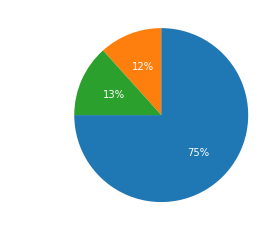

In [136]:
fig, ax = plt.subplots()
explode = [0., 0, 0]
labels = ['1 day', '7 days', 'above 7 days']
ax.pie([less_1, less_7, above_7], startangle=180, autopct='%1.0f%%', textprops={'color':"w"},explode=explode, labels=labels)
plt.savefig('days before purchase.png', dpi=600)

In [137]:
first_day_sub = data.loc[open_sub[open_sub <= 1].index]
month = (purchase['event_value_in_usd'] < 10).sum() 
month

37

In [138]:
year = purchase[(purchase['event_value_in_usd'] < 40) & (purchase['event_value_in_usd'] > 10)].shape[0]
year

47

In [139]:
life = purchase[purchase['event_value_in_usd'] > 40].shape[0]
life

4

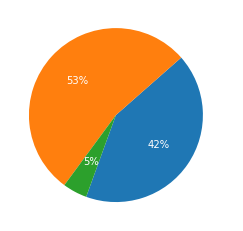

In [140]:
fig, ax = plt.subplots()
explode = [0.0, 0, 0]
labels = ['monthly', 'yearly', 'lifetime']
ax.pie([month, year, life], startangle=250, autopct='%1.0f%%', textprops={'color':"w"}, explode=explode, labels = labels)
plt.savefig('first day subs tariff.png', dpi=600)

**subsription time**

In [141]:
subs_tod = purchase['event_timestamp'].dt.hour.map(ftod)

In [142]:
subs_tod = subs_tod.value_counts()

In [143]:
subs_tod

afternoon    27
morning      25
evening      23
night        13
Name: event_timestamp, dtype: int64

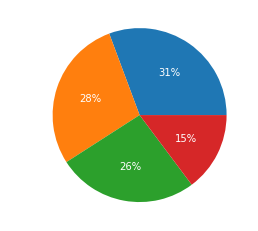

In [144]:
fig, ax = plt.subplots()
explode = [0.0, 0, 0, 0]
labels = subs_tod.index
ax.pie(subs_tod, startangle=0, autopct='%1.0f%%', textprops={'color':"w"}, explode=explode, labels = labels)
plt.savefig('subscription time.png', dpi=600)

**new sub users**

In [145]:
users[(users['event_value_in_usd'] > 0) & (users['user_first_touch_timestamp'] > start_date)]['active_duration'].dt.days.describe()

count    59.000000
mean     18.050847
std      16.118552
min       0.000000
25%       2.000000
50%      14.000000
75%      28.500000
max      51.000000
Name: active_duration, dtype: float64

In [146]:
new_sub_users = users[(users['event_value_in_usd'] > 0) & (users['user_first_touch_timestamp'] > start_date)]['user_pseudo_id'].unique()

In [147]:
new_sub_users

array(['047003CD5E984318B1E9C76910C9DAD7',
       '05b6875b4ef8e180cb3ff6381f7fa8ab',
       '078F613E9DE9481FB11BCEAF4C9B2DEC',
       '0852a1ea2cdc0b847652645c5b5c8fc2',
       '0B401995337E490CA49AEA8C902D29EC',
       '0DC514128EB94406B44A368054A5922F',
       '0E05A9B1135246FB87A8908DA9815FDB',
       '117A7A744442493A97FAE5F47DC5F094',
       '141DE52782C54F6F8A1A4E669C80C8C7',
       '1548bcb69227e09a561ac4954fe069ed',
       '1625b013ab65061ec2eb540b85d8e523',
       '16a7c2cb1b670e47ff80d522c4568937',
       '1BEA1056EEF24C72BAA77E23B7E577CA',
       '1D2ED4A1DA724C8B9888D0CC5E84D2D0',
       '1efd8266219d2fa5c001fe21996ed1d4',
       '21898C965E9D4716BCD6183F5EDB62E9',
       '26fdea762ade3e5a8aa47b4f640d1c8c',
       '3010FDAB7D3942D9BABF823364CB2B04',
       '353B042B141B4094BA41C77A43C22008',
       '35cab9a281a24683da3410047634ef95',
       '38b362f861b4efae533bc76ec0218b5b',
       '3DFBAC34990D4FC5A6A0CA70B49EBF7B',
       '4A4156E888C5451A98A84293D79C572C',
       '4B7

In [148]:
us.user_query('141DE52782C54F6F8A1A4E669C80C8C7', data).head(200)

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform
462018,2022-02-20,2022-02-20 12:29:33,user_engagement,NaT,NaN,2,72594,NaN,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS
462106,2022-02-20,2022-02-20 12:29:33,session_start,NaT,NaN,2,72594,NaN,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS
462105,2022-02-20,2022-02-20 12:29:33,first_open,NaT,NaN,1,72593,NaN,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS
462019,2022-02-20,2022-02-20 12:29:34,screen_view,NaT,NaN,2,72594,NaN,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS
462021,2022-02-20,2022-02-20 12:29:35,scr_WelcomeScreen,NaT,NaN,3,72595,a4c9b5e6-aaa7-4e44-a2e4-2475944cf75b,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS
462020,2022-02-20,2022-02-20 12:29:35,scr_OnBoardingScreen,NaT,NaN,3,72595,a4c9b5e6-aaa7-4e44-a2e4-2475944cf75b,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS
462022,2022-02-20,2022-02-20 12:29:41,onboarding_welcome_viewapp_tap,NaT,NaN,3,72595,a4c9b5e6-aaa7-4e44-a2e4-2475944cf75b,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS
462023,2022-02-20,2022-02-20 12:29:41,scr_InterviewScreen,NaT,NaN,3,72595,a4c9b5e6-aaa7-4e44-a2e4-2475944cf75b,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS
462024,2022-02-20,2022-02-20 12:30:00,onBoarding_interview1_result,NaT,NaN,4,94196,a4c9b5e6-aaa7-4e44-a2e4-2475944cf75b,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS
462025,2022-02-20,2022-02-20 12:30:00,scr_InterviewScreen,2022-02-20 12:29:41,NaN,4,94196,a4c9b5e6-aaa7-4e44-a2e4-2475944cf75b,141DE52782C54F6F8A1A4E669C80C8C7,2022-02-20 12:29:33,1758311369,IOS


**early sub users**

In [149]:
early_sub_users = users[(users['event_value_in_usd'] > 0) & (users['user_first_touch_timestamp'] < start_date)]['user_pseudo_id'].unique()

In [150]:
data[(data['event_value_in_usd'] > 0) & (data['user_first_touch_timestamp'] < start_date)]

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform
235418,2022-02-18,2022-02-18 06:13:00,in_app_purchase,2022-02-18 06:12:51,14.990000,55,1197283653,e65da61b-553b-461c-9ca8-852d7bd98990,8bcfbaecaf9b8389f05bfe8d508ebd82,2021-05-10 16:30:25,1758290749,ANDROID
236221,2022-02-18,2022-02-18 11:06:01,in_app_purchase,NaT,18.173402,28,76962,08bd768f-bdb8-4d8c-9c47-d1e3955c9a9f,5D14D82361B740ED8D2E09BD1FE15616,2021-05-02 15:49:44,1758311369,IOS
307638,2022-02-07,2022-02-07 20:18:02,in_app_purchase,NaT,2.233779,28,209538,ef1d8f76-7122-487a-b433-d2dd062219c1,C25AEB03EE5545A78E3D265B48B829D1,2021-03-03 20:57:52,1758311369,IOS
774913,2022-01-31,2022-01-31 18:57:01,in_app_purchase,NaT,1.990000,93,222139,NaN,77A4E59EC20043C4B8B7478563FB11B6,2021-01-29 03:19:44,1758311369,IOS
909781,2022-02-19,2022-02-19 08:40:22,in_app_purchase,NaT,19.400846,23,284864,7dfbd9d9-e19d-45f0-ae25-15bddaa1df59,D6693E013BFF4285B9160CD5120461DB,2021-10-10 09:38:50,1758311369,IOS
921921,2022-02-19,2022-02-19 10:03:35,in_app_purchase,NaT,18.132698,20,131586,a0173e33-9c8a-4428-8209-826e8a65bfc6,C7CDEA0DE6664009B7D0901ED0723FB5,2020-04-24 16:43:20,1758311369,IOS
1002444,2022-02-16,2022-02-16 09:59:20,in_app_purchase,NaT,2.928718,68,246485,0f52c555-de6e-4b96-8c60-13d8a6ab59b6,B835237759AA4776BE314700B15C27E4,2021-03-06 20:51:00,1758311369,IOS
1005985,2022-02-17,2022-02-17 11:29:27,in_app_purchase,NaT,2.249136,25,114123,fc0efe48-1554-47f3-8471-c9720dfb5cf1,F10A9B5222544BFDA3D26F3397DCE12B,2020-06-19 17:31:26,1758311369,IOS
1073955,2022-02-17,2022-02-17 11:10:46,in_app_purchase,2022-02-17 11:10:38,23.745302,114,606955226,b17d42f4-1e4c-483f-a9c8-529f4bf820fd,605ac0d874ad62d8cd4139a35d6a0fef,2021-05-23 22:59:20,1758290749,ANDROID
1733100,2022-02-01,2022-02-01 04:54:34,in_app_purchase,NaT,5.562088,35,69928,26361d55-44f5-4b93-a501-8101f08ca131,6C7939468B9F4641B480B60301FC86C4,2021-08-24 13:05:19,1758311369,IOS


### Platform

In [151]:
users[users['event_value_in_usd'] > 0]['platform'].value_counts()

IOS        53
ANDROID    35
Name: platform, dtype: int64

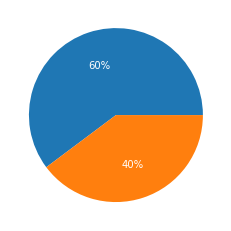

In [152]:
fig, ax = plt.subplots()
labels = ['IOS', 'ANDROID']
ax.pie([53, 35], startangle=0, autopct='%1.0f%%', textprops={'color':"w"}, labels = labels)
plt.savefig('subs platform.png', dpi=600)

In [153]:
users

,user_pseudo_id,max,user_first_touch_timestamp,active_duration,event_value_in_usd,session_start_counts,unlock_start,unlock_finish,afternoon,evening,...,platform,training_counts,finish_training_counts,finish_ratio,breathing_counts,meditation_counts,game_counts,activity_sum,most_training,uninstall
0,000150e523a4ece168a408a1a9e4d6d6,2022-02-24,2022-02-22,2 days,0.0,7.0,0.0,0.0,4.0,1.0,...,ANDROID,42.0,2.0,0.047619,9.0,0.0,3.0,54.0,mbsc_start_training_med1,False
1,000185282d979ade370ea3c072b06507,2022-02-10,2022-01-10,31 days,0.0,1.0,0.0,0.0,1.0,0.0,...,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,False
2,0001e48c9217f5614db12a3b3cb30b35,NaT,2022-02-05,0 days,0.0,NaN,0.0,0.0,0.0,0.0,...,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,True
3,00025b69a6a6a4c18bfd21f137b62685,2022-02-08,2022-01-11,28 days,0.0,4.0,0.0,0.0,2.0,2.0,...,ANDROID,7.0,4.0,0.571429,14.0,1.0,7.0,29.0,start_training_qh4,False
4,00026eef62717d579a0a89ee3853743e,2022-02-26,2022-02-25,1 days,0.0,2.0,0.0,0.0,0.0,0.0,...,ANDROID,2.0,1.0,0.500000,1.0,1.0,1.0,5.0,start_training_ch1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83293,fff47e71da4b19218705a16de6eef68a,NaT,2022-03-03,0 days,0.0,NaN,0.0,0.0,0.0,0.0,...,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,True
83294,fff5e1fb894a59add89b18601b8a701f,2022-03-28,2022-03-16,12 days,0.0,13.0,0.0,0.0,7.0,3.0,...,ANDROID,40.0,1.0,0.025000,4.0,0.0,4.0,48.0,start_training_qh3,False
83295,fff684d58e7fa0fc0093601dd8b22961,NaT,2021-11-13,0 days,0.0,1.0,0.0,0.0,0.0,0.0,...,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,False
83296,fff7bd35c98774c099dc6155129c530a,2022-03-27,2022-03-27,0 days,0.0,3.0,0.0,0.0,0.0,0.0,...,ANDROID,5.0,2.0,0.400000,5.0,3.0,4.0,17.0,start_training_ch3,False


In [154]:
start_date

Timestamp('2022-01-27 00:00:00')

In [155]:
cond1 = users['user_first_touch_timestamp'] >= start_date
cond5 = users['user_first_touch_timestamp'] < start_date
cond2 = users['event_value_in_usd'] > 0
cond3 = users['platform'] == 'ANDROID'
cond4 = users['platform'] != 'ANDROID'

In [156]:
# android new subs 
android_new_subs = users[(cond1) & (cond2) & (cond3)].shape[0]

In [157]:
# android new users
android_new_users = users[(cond1) & (cond3)].shape[0]

In [158]:
# ios new subs
ios_new_subs = users[(cond1) & (cond2) & (cond4)].shape[0]

In [159]:
# ios new users
ios_new_users = users[(cond1) & (cond4)].shape[0]

In [160]:
# android early subs
android_early_subs = users[(cond5) & (cond2) & (cond3)].shape[0]

In [161]:
# android early users
android_early_users = users[(cond5) & (cond3)].shape[0]

In [162]:
# ios early subs 
ios_early_subs = users[(cond5) & (cond2) & (cond4)].shape[0]

In [163]:
ios_early_users = users[(cond5) & (cond4)].shape[0]

In [164]:
# conversion in 100 percentage
android_conversion = [android_new_subs*100/android_new_users, android_early_subs*100/android_early_users]
android_conversion = [round(element, 2) for element in android_conversion]
android_conversion

[0.06, 0.03]

In [165]:
ios_conversion = [ios_new_subs*100/ios_new_users, ios_early_subs*100/ios_early_users]
ios_conversion = [round(element, 2) for element in ios_conversion]
ios_conversion

[0.79, 1.36]

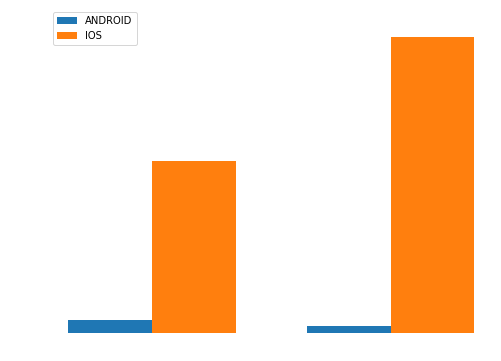

In [166]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(2)
width = 0.35
fig_1 = ax.bar(x-0.5*width,android_conversion, width, label='ANDROID')
fig_2 = ax.bar(x+0.5*width,ios_conversion, width, label='IOS')
ax.legend()
ax.bar_label(fig_1, color='w')
ax.bar_label(fig_2, color='w')
ax.set_ylabel('Conversion 100 %', fontsize=14, color='w')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
ax.set_xticks(x, ['new users', 'early users'], fontsize=14)
#ax.set_title('retention rate of 2, 7, 14 and 28 days')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.bar_label(fig_1, color='w')
ax.bar_label(fig_2, color='w')
plt.ylim(0, 1.5)
plt.show()
fig.savefig('platform conversion.png', transparent=True, dpi=600)

### training counts / finish ratio

In [167]:
users.head()

,user_pseudo_id,max,user_first_touch_timestamp,active_duration,event_value_in_usd,session_start_counts,unlock_start,unlock_finish,afternoon,evening,...,platform,training_counts,finish_training_counts,finish_ratio,breathing_counts,meditation_counts,game_counts,activity_sum,most_training,uninstall
0,000150e523a4ece168a408a1a9e4d6d6,2022-02-24,2022-02-22,2 days,0.0,7.0,0.0,0.0,4.0,1.0,...,ANDROID,42.0,2.0,0.047619,9.0,0.0,3.0,54.0,mbsc_start_training_med1,False
1,000185282d979ade370ea3c072b06507,2022-02-10,2022-01-10,31 days,0.0,1.0,0.0,0.0,1.0,0.0,...,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,False
2,0001e48c9217f5614db12a3b3cb30b35,NaT,2022-02-05,0 days,0.0,NaN,0.0,0.0,0.0,0.0,...,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,True
3,00025b69a6a6a4c18bfd21f137b62685,2022-02-08,2022-01-11,28 days,0.0,4.0,0.0,0.0,2.0,2.0,...,ANDROID,7.0,4.0,0.571429,14.0,1.0,7.0,29.0,start_training_qh4,False
4,00026eef62717d579a0a89ee3853743e,2022-02-26,2022-02-25,1 days,0.0,2.0,0.0,0.0,0.0,0.0,...,ANDROID,2.0,1.0,0.500000,1.0,1.0,1.0,5.0,start_training_ch1,True


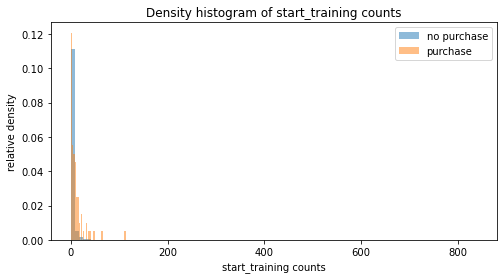

In [168]:
fib, ax = plt.subplots(figsize=(8, 4))
ax.hist(users.query('event_value_in_usd == 0').training_counts, label='no purchase', density=True, alpha=0.5, bins=100)
ax.hist(users.query('event_value_in_usd > 0').training_counts, label='purchase', density=True, alpha=0.5, bins=50)
ax.set_xlabel('start_training counts')
ax.set_ylabel('relative density')
ax.set_title('Density histogram of start_training counts')
plt.legend()
plt.show()

**Training**

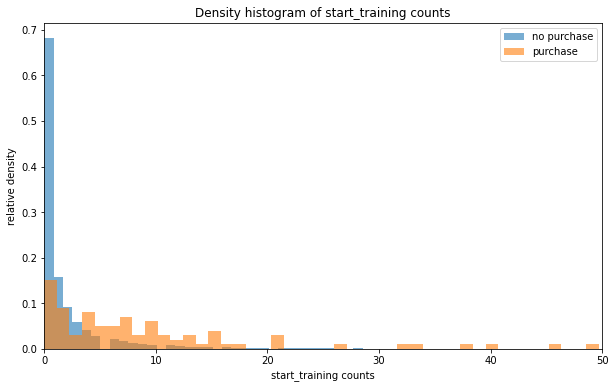

In [169]:
fib, ax = plt.subplots(figsize=(10, 6))
ax.hist(users.query('event_value_in_usd == 0').training_counts, label='no purchase', density=True, alpha=0.6, bins=1000)
ax.hist(users.query('event_value_in_usd > 0').training_counts, label='purchase', density=True, alpha=0.6, bins=100)
ax.set_xlabel('start_training counts')
ax.set_ylabel('relative density')
ax.set_title('Density histogram of start_training counts')
plt.legend()
plt.xlim(0, 50)
plt.show()

**Breathing**

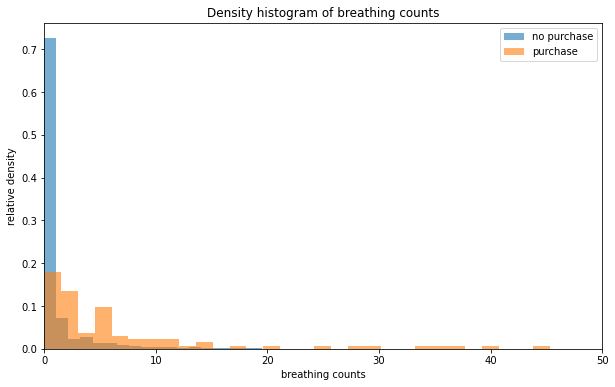

In [170]:
fib, ax = plt.subplots(figsize=(10, 6))
ax.hist(users.query('event_value_in_usd == 0').breathing_counts, label='no purchase', density=True, alpha=0.6, bins=500)
ax.hist(users.query('event_value_in_usd > 0').breathing_counts, label='purchase', density=True, alpha=0.6, bins=100)
ax.set_xlabel('breathing counts')
ax.set_ylabel('relative density')
ax.set_title('Density histogram of breathing counts')
plt.legend()
plt.xlim(0, 50)
plt.show()

**Meditation**

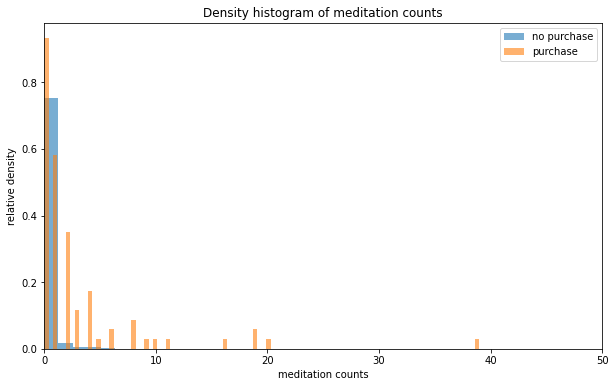

In [171]:
fib, ax = plt.subplots(figsize=(10, 6))
ax.hist(users.query('event_value_in_usd == 0').meditation_counts, label='no purchase', density=True, alpha=0.6, bins=200)
ax.hist(users.query('event_value_in_usd > 0').meditation_counts, label='purchase', density=True, alpha=0.6, bins=100)
ax.set_xlabel('meditation counts')
ax.set_ylabel('relative density')
ax.set_title('Density histogram of meditation counts')
plt.legend()
plt.xlim(0, 50)
plt.show()

In [172]:
users.query('event_value_in_usd == 0').training_counts.describe()

count    83210.00000
mean         2.22055
std          7.09899
min          0.00000
25%          0.00000
50%          0.00000
75%          2.00000
max        839.00000
Name: training_counts, dtype: float64

In [173]:
users['activity_sum'].describe()

count    83298.000000
mean         4.581719
std         17.185335
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       2036.000000
Name: activity_sum, dtype: float64

(0.0, 10.0)

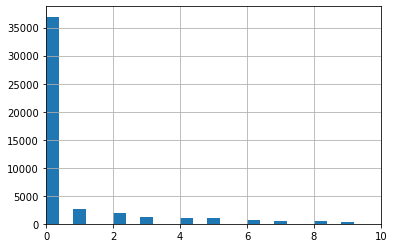

In [174]:
users.query('active_duration.dt.days < 2')['activity_sum'].hist(bins= 250)
plt.xlim(0, 10)

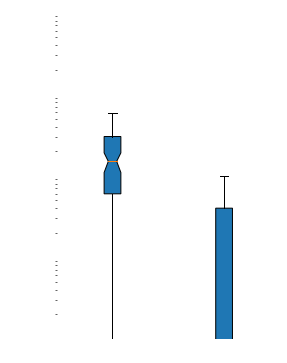

In [224]:
fig, ax = plt.subplots(figsize=(4, 6))
box_data = [users.query('event_value_in_usd > 0')['activity_sum'] ,users.query('event_value_in_usd == 0')['activity_sum']]
ax.boxplot(box_data, notch=True, patch_artist=True,
          flierprops=dict(color='white', markeredgecolor='white'),
          )
ax.set_ylabel('activities counts', fontsize=14, color='w')
ax.set_yscale('log')
ax.set_xticks([1, 2], ['purchase', 'no purchase'])
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)#
plt.ylim(0.1, 1000)
plt.savefig('training count box.png', dpi=600, transparent=True, bbox_inches='tight')

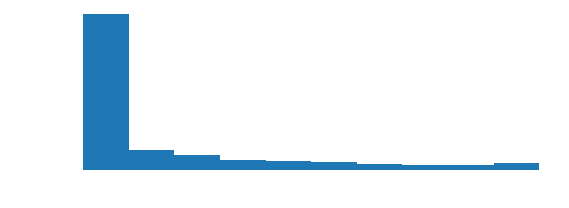

In [254]:
fig, ax = plt.subplots(figsize=(9, 3))
ax.hist(users[(users['event_value_in_usd'] == 0) & (users['activity_sum'] <= 10)]['activity_sum'])
ax.set_ylabel('Frequency', color='white')
ax.set_xlabel('activity count', color='white')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('less than 10 activities.png', dpi=600, transparent=True, bbox_inches='tight')

In [240]:
users.query['activity_sum'].describe()

count    83210.000000
mean         4.555150
std         17.101724
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       2036.000000
Name: activity_sum, dtype: float64

- purchased users train more offten than non purchase users
    - median purchased users train **7 times**
    - median unpurchased users only train **1 time**
- large amount of anomalies in both purchase and non purchase users
    - many non purchase users trained many times
- the training_counts agrees with the session_counts

#### Anomalies (unpurchased users with abnormal high training_counts)

- I will call them free_fans

In [176]:
def upper_boundary(data):
    Q3 = data.quantile(0.75)
    Q1 = data.quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + 2 * IQR
    return upper
upper_boundary = upper_boundary(users.query('event_value_in_usd == 0').training_counts)

free_fans = users[(users.training_counts > upper_boundary) & (users.event_value_in_usd == 0)]

In [177]:
free_fans.shape[0]

7624

In [178]:
free_fans.finish_ratio.describe()

count    7624.000000
mean        0.274802
std         0.280301
min         0.000000
25%         0.071429
50%         0.200000
75%         0.416667
max         3.833333
Name: finish_ratio, dtype: float64

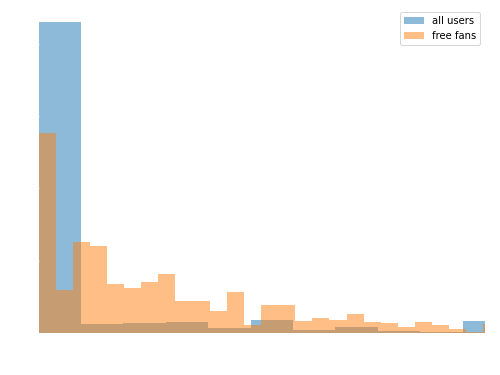

In [179]:
fib, ax = plt.subplots(figsize=(8, 6))
ax.hist(users.finish_ratio, label='all users', density=True, alpha=0.5, bins=100)
ax.hist(free_fans.finish_ratio, label='free fans', density=True, alpha=0.5, bins=100)
ax.set_xlabel('finish training ratio', color='w', fontsize=14)
ax.set_ylabel('relative density', color='w', fontsize=14)
#ax.set_title('Density histogram of finish training ratio', color='w', fontsize=14)
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend()
plt.xlim(0, 1)
#plt.show()
plt.savefig('finish train ratio.png', transparent=True, dpi=600)

In [180]:
free_fans[free_fans['finish_ratio'] >= 0.4].shape[0]

2033

- free fans users have higher finish ratio compare to others
- 287 free fans have a finish ratio more than 0.4

### Pop activity

#### Training

In [181]:
pop_training = users['most_training'].value_counts(dropna=True, normalize=True).head(10)

In [182]:
pop_training

start_training_qh0           0.342600
start_training_qh3           0.161179
start_training_qh_breathe    0.143765
mbsc_start_training_med1     0.084467
start_training_qh_game       0.032953
start_training_ch2           0.031301
start_training_ch1           0.031105
start_training_qh4           0.030153
start_training_qh2           0.028501
start_training_qh1           0.028501
Name: most_training, dtype: float64

In [183]:
p_pop_training = users.query('event_value_in_usd > 0')['most_training'].value_counts(dropna=True, normalize=True).head(10)

In [184]:
p_pop_training

start_training_qh0           0.3125
start_training_qh3           0.2125
mbsc_start_training_med1     0.1000
start_training_ch2           0.0750
start_training_qh_breathe    0.0750
start_training_ch3           0.0500
start_training_ch1           0.0500
start_training_qh4           0.0375
start_training_qh_game       0.0250
mbsc_start_training_med3     0.0125
Name: most_training, dtype: float64

In [185]:
ff_top10_training = free_fans['most_training'].value_counts(dropna=True, normalize=True).head(10)

In [186]:
ff_top10_training

start_training_qh0           0.298793
start_training_qh3           0.231375
start_training_qh_breathe    0.142183
mbsc_start_training_med1     0.071878
start_training_ch2           0.037907
start_training_ch1           0.029381
start_training_qh4           0.028856
start_training_ch3           0.027413
start_training_qh1           0.024397
start_training_qh2           0.022167
Name: most_training, dtype: float64

C:\Users\Wang\AppData\Local\Temp\ipykernel_14608\279931435.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels_1, rotation=75, fontsize=14)
C:\Users\Wang\AppData\Local\Temp\ipykernel_14608\279931435.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels_2, rotation=75, fontsize=14)


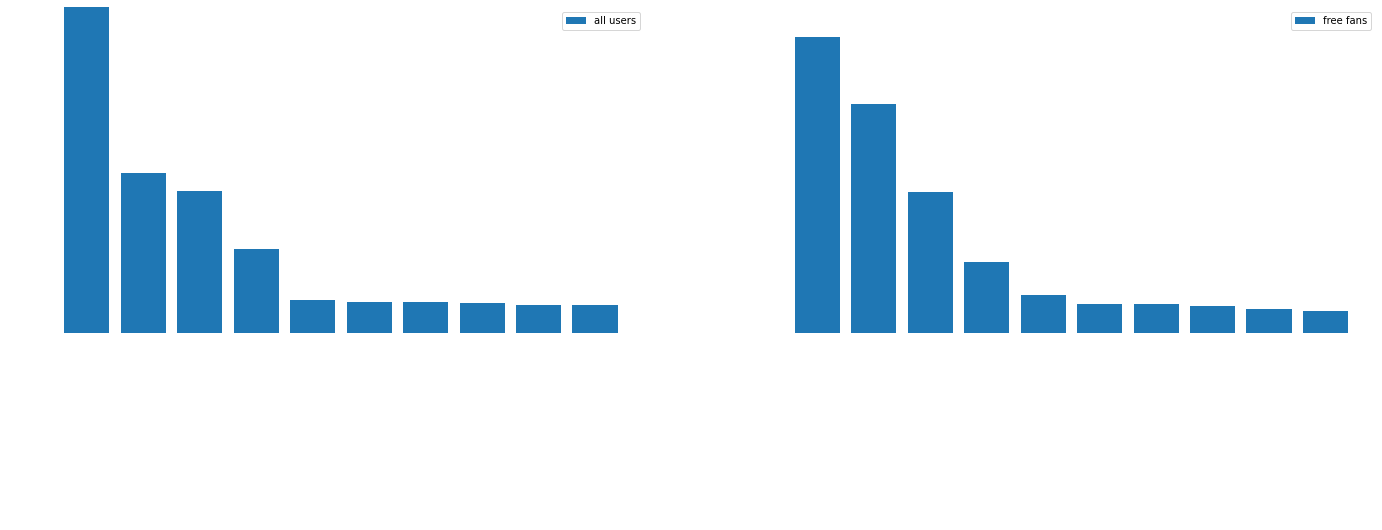

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
labels_1 = pop_training.index
ax1.bar(labels_1, pop_training, label='all users')
ax1.set_xticklabels(labels_1, rotation=75, fontsize=14)
ax1.set_ylim(0, 0.33)
ax1.tick_params(axis='y', colors='w')
ax1.tick_params(axis='x', colors='w')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

labels_2 = ff_top10_training.index
ax2.bar(ff_top10_training.index, ff_top10_training, label='free fans')
ax2.set_xticklabels(labels_2, rotation=75, fontsize=14)
ax2.set_ylim(0, 0.33)
ax2.tick_params(axis='y', colors='w')
ax2.tick_params(axis='x', colors='w')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.legend()
ax2.legend()
#plt.show()
plt.savefig('pop training.png', transparent=True, dpi=600, bbox_inches='tight')

In [189]:
us.event_query('start_training_', data).event_name.value_counts(normalize=True).head(10)

start_training_qh0           0.212545
start_training_qh_breathe    0.168530
start_training_qh3           0.160982
mbsc_start_training_med1     0.057243
start_training_qh4           0.048203
start_training_qh1           0.043121
start_training_qh2           0.042065
start_training_ch2           0.035540
start_training_qh6           0.033962
start_training_qh_game       0.032633
Name: event_name, dtype: float64

In [190]:
free_fans.morning.sum()

20609.0

In [191]:
free_fans.afternoon.sum()

24041.0

In [192]:
free_fans.iloc[:,4:8].sum()

event_value_in_usd          0.0
session_start_counts    75562.0
unlock_start             6452.0
unlock_finish             376.0
dtype: float64

- free fan users tend to use the app more often in afternoon (12 - 18)

In [193]:
free_fans.query('platform == "ANDROID"').shape[0]

7283

In [194]:
len(users.query('platform == "ANDROID"')) / len(users)

0.9299262887464285

- 99.2 % of free fans are from the Android platform
- higher than the android percentage (95.8 %) among users who signed up in feb

#### Train, Breath, Meditataion, Game

In [195]:
users.head()

,user_pseudo_id,max,user_first_touch_timestamp,active_duration,event_value_in_usd,session_start_counts,unlock_start,unlock_finish,afternoon,evening,...,platform,training_counts,finish_training_counts,finish_ratio,breathing_counts,meditation_counts,game_counts,activity_sum,most_training,uninstall
0,000150e523a4ece168a408a1a9e4d6d6,2022-02-24,2022-02-22,2 days,0.0,7.0,0.0,0.0,4.0,1.0,...,ANDROID,42.0,2.0,0.047619,9.0,0.0,3.0,54.0,mbsc_start_training_med1,False
1,000185282d979ade370ea3c072b06507,2022-02-10,2022-01-10,31 days,0.0,1.0,0.0,0.0,1.0,0.0,...,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,False
2,0001e48c9217f5614db12a3b3cb30b35,NaT,2022-02-05,0 days,0.0,NaN,0.0,0.0,0.0,0.0,...,ANDROID,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,True
3,00025b69a6a6a4c18bfd21f137b62685,2022-02-08,2022-01-11,28 days,0.0,4.0,0.0,0.0,2.0,2.0,...,ANDROID,7.0,4.0,0.571429,14.0,1.0,7.0,29.0,start_training_qh4,False
4,00026eef62717d579a0a89ee3853743e,2022-02-26,2022-02-25,1 days,0.0,2.0,0.0,0.0,0.0,0.0,...,ANDROID,2.0,1.0,0.500000,1.0,1.0,1.0,5.0,start_training_ch1,True


In [196]:
train_cnt = users['training_counts'].sum()
breathe_cnt = users.breathing_counts.sum()
meditation_cnt = users.meditation_counts.sum()
game_cnt =  users.game_counts.sum()

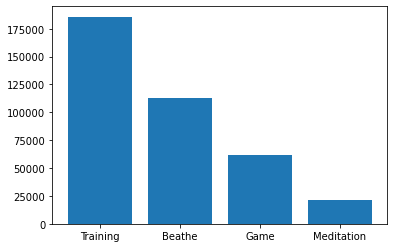

In [197]:
fig, ax = plt.subplots()
x = [i for i in range(4)]
ax.bar(x, [train_cnt, breathe_cnt, game_cnt, meditation_cnt])
ax.set_xticks(x, ['Training', 'Beathe', 'Game', 'Meditation'])

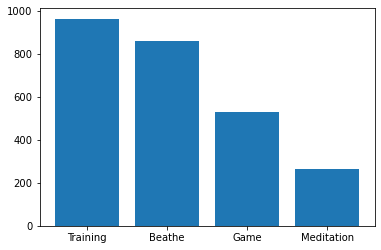

In [198]:
p_train_cnt = users.query('event_value_in_usd > 0')['training_counts'].sum()
p_breathe_cnt = users.query('event_value_in_usd > 0').breathing_counts.sum()
p_meditation_cnt = users.query('event_value_in_usd > 0').meditation_counts.sum()
p_game_cnt = users.query('event_value_in_usd > 0').game_counts.sum()
fig, ax = plt.subplots()
x = [i for i in range(4)]
p = ax.bar(x, [p_train_cnt, p_breathe_cnt, p_game_cnt, p_meditation_cnt])
ax.set_xticks(x, ['Training', 'Beathe', 'Game', 'Meditation'])

### Unlock finish (5 days of consecutive training)

In [199]:
unlock_users =  users.unlock_start.sum()

In [200]:
total_user = users.shape[0]

In [201]:
unlock_finish_users = users.unlock_finish.sum()

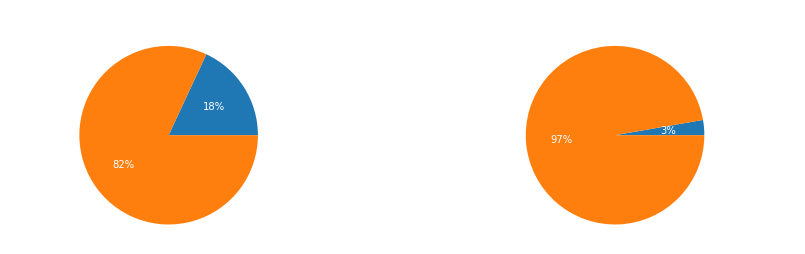

In [202]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.subplots_adjust(wspace = 1 )
labels1 = ['unlock users', 'no unlock users']
sizes1 = [unlock_users, total_user-unlock_users]
ax1.pie(sizes1, labels=labels1, autopct='%1.0f%%', textprops={'color':"w"})
ax1.set_title('Among all users', color='w', fontsize=14)

labels2 = ['unlock and finish', 'unlock without finish']
sizes2 = [unlock_finish_users, unlock_users-unlock_finish_users]
ax2.pie(sizes2, labels=labels2, autopct='%1.0f%%', textprops={'color':"w"})
ax2.set_title('Among unlock user', color='w', fontsize=14)
plt.show()
fig.savefig('unlock_finish.png', format='png', dpi=600)

- 18 % of users performed the 5 days unlock
    - 9 % of purchase users performed the 5 days unlock
- only 0.3 % of users have passed all 5 days
- among the user who performed the 5 days unlock, 2.2 % of them passed all 5 days
    - among the purchased users who performed the 5 days unlock, 2.8 % of them passed all 5 days
- **very few** users can pass the 5 days of consecutive training

### Session time

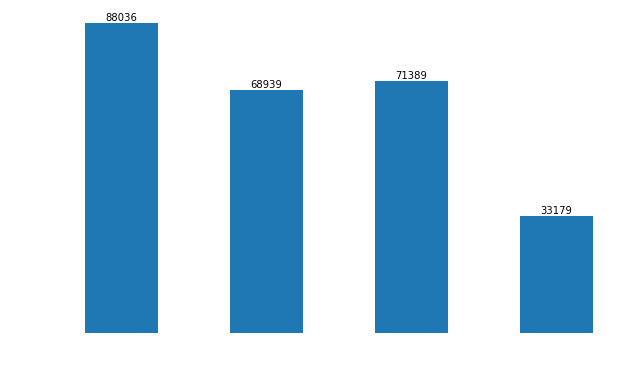

In [212]:
fig, ax = plt.subplots(figsize=(10, 6))
fig1 = ax.bar([0, 1, 2, 3] ,users.iloc[:,8:12].sum(), width=0.5)
ax.set_xticks([0, 1, 2, 3], ['afternoon \n 12 - 18', 'evening \n 18 - 24', 'morning \n 06 - 12', 'night \n 00 - 06'])

ax.bar_label(fig1)
ax.set_xlabel('session time', color='w')
ax.set_ylabel('session counts', color='w')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.show()
plt.savefig('session_time.png', transparent=True, dpi=600, bbox_inches='tight')

- users engage with the app more often in afternoon from 12 - 18
- but the difference between morning, afternoon and evening is not significant
- sigficantly less session at night

### App remove

In [218]:
users.columns

Index(['user_pseudo_id', 'max', 'user_first_touch_timestamp',
       'active_duration', 'event_value_in_usd', 'session_start_counts',
       'unlock_start', 'unlock_finish', 'afternoon', 'evening', 'morning',
       'night', 'platform', 'training_counts', 'finish_training_counts',
       'finish_ratio', 'breathing_counts', 'meditation_counts', 'game_counts',
       'activity_sum', 'most_training', 'uninstall'],
      dtype='object')

In [215]:
free_fans.uninstall.mean()

0.23176810073452256

In [216]:
users.uninstall.mean()

0.40780090758481596

In [219]:
users.query('event_value_in_usd != 0').uninstall.mean()

0.045454545454545456

In [221]:
users.query('event_value_in_usd == 0').uninstall.mean()

0.40818411248648

- almost half the users removed the app 
- **one third of the purchased users removed the app**